In [38]:
from swampy import structshape as ss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import boto3
import sys
import os

### Ingest school directory dataset from S3

In [39]:
conn = boto3.client('s3')
local_dir_filename = 'directory_all.csv.bak'
if not os.path.exists('./' + local_dir_filename):
    conn.download_file(
        'edu-data-bucket', 'directory/schools_ccd_directory.csv', local_dir_filename)


In [40]:
df0 = pd.read_csv(local_dir_filename, low_memory=False)


### Shape, datatype, gross feature analysis

In [41]:
df0.shape, df0.dtypes


((3381565, 52),
 year                             int64
 ncessch                          int64
 ncessch_num                      int64
 school_id                      float64
 school_name                     object
 leaid                          float64
 lea_name                        object
 state_leaid                     object
 seasch                          object
 street_mailing                  object
 city_mailing                    object
 state_mailing                   object
 zip_mailing                     object
 street_location                 object
 city_location                   object
 state_location                  object
 zip_location                   float64
 phone                           object
 fips                           float64
 latitude                       float64
 longitude                      float64
 csa                            float64
 cbsa                           float64
 urban_centric_locale           float64
 county_code            

In [42]:
df0.head(n=3)


,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,state_location,zip_location,phone,fips,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
0,1986,10000201704,10000201704,1704.0,CHALKVILLE CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0020,NaN,BIRMINGHAM,NaN,35220,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,129.0,0,0,1,1,NaN,NaN,NaN,NaN
1,1986,10000201705,10000201705,1705.0,MT MEIGS CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0030,NaN,MOUNT MEIGS,NaN,36057,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,193.0,0,0,1,1,NaN,NaN,NaN,NaN
2,1986,10000201706,10000201706,1706.0,VACCA CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0040,NaN,BIRMINGHAM,NaN,35206,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,7.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,NaN,NaN,NaN,NaN,162.0,0,0,1,1,NaN,NaN,NaN,NaN


Observations
* There are many years and schools in this dataset that are not in the graduation rate dataset
* Ncessch and ncessch_num appear to be duplicates
* Features shared with the Adjusted Cohort dataset are
    * ncessch
    * school_name
    * leaid
    * lea_name
    * state_location
    * fips

In [43]:

pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 99)
df0.describe()


,year,ncessch,ncessch_num,school_id,leaid,zip_location,fips,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id
count,3381565.0,3381565.0,3381565.0,3381071.0,3381071.0,2331863.0,3381441.0,2138873.0,2138876.0,714832.0,714832.0,3289807.0,1947798.0,2142403.0,3381071.0,3381053.0,3366478.0,3366478.0,722160.0,1112676.0,2316256.0,2276527.0,2331825.0,2316256.0,1732412.0,704459.0,3305125.0,2240459.0,2234195.0,2252716.0,197537.0,3356268.0,3381565.0,3381565.0,3381565.0,3381565.0,499259.0,510036.0
mean,2003.7,293773792109.1,293773792109.1,89183.6,2937546.8,69066.3,29.3,35.8,-87.9,234.9,26865.6,14.5,28874.0,1.7,1.2,1.1,2.7,7.2,0.0,4.2,0.5,-0.2,-0.1,-0.4,-0.2,0.2,29.0,186.7,32.6,220.8,181.0,493.8,0.0,0.6,0.3,0.2,0.9,2892.7
std,10.0,165506835486.2,165506835486.2,570312.1,1654859.8,105615.9,16.6,10.5,26.0,188.9,14183.7,13.8,16814.1,1.2,0.7,0.5,4.0,3.4,0.0,2.0,0.7,1.3,0.6,0.8,0.5,0.9,25.0,227.8,43.7,254.1,185.3,436.1,0.1,0.5,0.5,0.4,0.9,1665.2
min,1986.0,10000200277.0,10000200277.0,0.0,100002.0,-2.0,1.0,-34.2,-966.7,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,-1.0,-2.0,-2.0,0.0,-3.0,-3.0,-3.0,-2.0,-2.0,-2.0,-1.0,-3.0,-3.0,-3.0,-3.0,3.0,-3.0,0.0,0.0,0.0,0.0,-1.0,-2.0
25%,1995.0,170004505239.0,170004505239.0,633.0,1700045.0,29906.0,17.0,33.5,-98.5,-2.0,16980.0,4.0,13151.0,1.0,1.0,1.0,0.0,5.0,0.0,4.0,0.0,-2.0,0.0,-1.0,-1.0,0.0,13.4,31.0,3.0,44.0,52.0,219.0,0.0,0.0,0.0,0.0,0.0,1309.0
50%,2004.0,291629000766.0,291629000766.0,1492.0,2916230.0,55108.0,29.0,38.5,-87.9,220.0,29620.0,7.0,28159.0,1.0,1.0,1.0,0.0,6.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,117.0,22.0,150.0,130.0,418.0,0.0,1.0,0.0,0.0,1.0,2902.0
75%,2012.0,421859000297.0,421859000297.0,3591.0,4218580.0,79415.0,42.0,41.6,-79.6,408.0,38300.0,21.0,42069.0,3.0,1.0,1.0,6.0,10.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,267.0,46.0,316.0,252.0,641.0,0.0,1.0,1.0,0.0,1.0,4212.0
max,2020.0,780003000037.0,780003000037.0,7800037.0,7800030.0,999500.0,78.0,96.8,145.8,566.0,49820.0,43.0,78030.0,7.0,5.0,8.0,15.0,15.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,3.0,2189.7,10848.0,4615.0,10848.0,3873.0,26335.0,1.0,1.0,1.0,1.0,5.0,7898.0


### Strategy
* Subset to our years of interest and potentially interesting columns
* Explore missingness
* Explore distributions, outliers 

In [44]:
# Subset to our years of interest
years = list(range(2010, 2019))
our_years = df0.query('year in @years')
pd.set_option('display.max_columns', 99)
our_years.head(n=3)


,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,state_location,zip_location,phone,fips,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
2252826,2010,10000200277,10000200277,277.0,SEQUOYAH SCH - CHALKVILLE CAMPUS,100002.0,ALABAMA YOUTH SERVICES,210,0020,P O BOX 9486,BIRMINGHAM,AL,35220,RT 2 OLD SPRINGVILLE RD,PINSON,AL,36126.0,2056808574,1.0,33.7,-86.6,NaN,NaN,41.0,1073.0,3.0,4.0,1.0,7.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,0,1,1,NaN,NaN,NaN,NaN
2252827,2010,10000201402,10000201402,1402.0,EUFAULA SCH - EUFAULA CAMPUS,100002.0,ALABAMA YOUTH SERVICES,210,0025,315 OUTBACK ROAD,CLAYTON,AL,36016,315 OUTBACK RD,CLAYTON,AL,36016.0,3346874441,1.0,31.9,-85.2,NaN,NaN,42.0,1005.0,4.0,4.0,1.0,3.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,1,1,1,NaN,NaN,NaN,NaN
2252828,2010,10000201667,10000201667,1667.0,CAMPS,100002.0,ALABAMA YOUTH SERVICES,210,0050,P O BOX 66,MT MEIGS,AL,36057,INDUSTRIAL SCHOOL RD,MT MEIGS,AL,36057.0,3342153850,1.0,32.4,-86.1,NaN,NaN,41.0,1101.0,3.0,4.0,1.0,7.0,12.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,NaN,0.0,-2.0,-2.0,-2.0,NaN,-2.0,0,0,1,1,NaN,NaN,NaN,NaN


### Codebook
* variable	format	label
* year	numeric	Academic year (fall semester)
* ncessch	string	National Center for Education Statistics (NCES) identification number
* ncessch_num	numeric	National Center for Education Statistics (NCES) identification number (numeric)
* school_id	string	School identification number (NCES)
* school_name	string	School name
* leaid	string	Local education agency identification number (NCES)
* lea_name	string	Local education agency name
* state_leaid	string	Local education agency identification number (state)
* seasch	string	School identification number (state)
* street_mailing	string	Street of mailing address 
* city_mailing	string	City of mailing address
* state_mailing	string	State of mailing address 
* zip_mailing	string	Zip code of mailing address 
* street_location	string	Street of location
* city_location	string	City of location
* state_location	string	State of location
* zip_location	string	Zip code of location
* phone	string	Telephone number
* fips	fips	Federal Information Processing Standards state code
* latitude	numeric	Latitude of institution
* longitude	numeric	Longitude of institution
* csa	numeric	Combined statistical area
* cbsa	numeric	Core-based statistical area
* urban_centric_locale	urban_centric_locale	Degree of urbanization (urban-centric locale)
* county_code	numeric	County code
* congress_district_id	numeric	State and 114th congressional district identification number
* state_leg_district_lower	string	State legislative district—lower
* state_leg_district_upper	string	State legislative district—upper
* school_level	school_level	School level 
* school_type	school_type	School type 
* school_status	school_status	Status at start of school year
* lowest_grade_offered	grade_offered_ccd	Lowest grade offered
* highest_grade_offered	grade_offered_ccd	Highest grade offered 
* elem_cedp	yes_no	Elementary school indicator (Center on Education Data and Policy variable)
* middle_cedp	yes_no	Middle school indicator (Center on Education Data and Policy variable)
* high_cedp	yes_no	High school indicator (Center on Education Data and Policy variable)
* ungrade_cedp	yes_no	Ungraded school indicator (Center on Education Data and Policy variable)
* bureau_indian_education	yes_no	Bureau of Indian Education school
* title_i_status	title_i_status	Title I status
* title_i_eligible	yes_no	Title I eligibility
* title_i_schoolwide	yes_no	Schoolwide Title I eligibility
* charter	yes_no	Charter school
* magnet	yes_no	Magnet school
* shared_time	yes_no	Shared time
* virtual	virtual	Virtual school 
* teachers_fte	numeric	Number of full-time equivalent teachers
* lunch_program	lunch_program	National School Lunch Program (NSLP) status
* free_lunch	numeric	Number of students eligible for free lunch
* reduced_price_lunch	numeric	Number of students eligible for reduced-price lunch
* free_or_reduced_price_lunch	numeric	Number of students eligible for free or reduced-price lunch
* direct_certification	numeric	Number of students eligible for free lunch by direct certification
* enrollment	numeric	Student enrollment


### Remove duplicated columns from other dataset

In [45]:
# Remove uninteresting columns
# Uninteresting because duplicate: 'school_id', 'ncessch_num', 'leaid','lea_name','school_name', 'state_location','fips', 'phone_string'
# Verify ncessch == ncescch_num since we will merge on it later.
# Leave school district identifier for verification that the merge worked later.
assert all(our_years.ncessch == our_years.ncessch_num)
our_years.drop(['ncessch_num', 'school_id', 'lea_name',
               'school_name', 'state_location', 'fips'], axis=1, inplace=True)


/tmp/ipykernel_15412/2491655424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_years.drop(['ncessch_num', 'school_id', 'lea_name',


### Missingness

Text(0.5, 1.0, 'Nulls per feature')

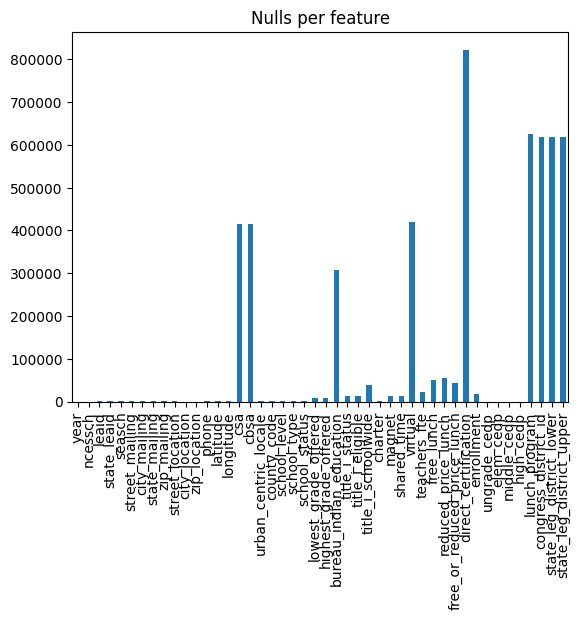

In [46]:
our_years.isnull().sum().plot.bar()
plt.title("Nulls per feature")


Observation: Looking in the codebook, we see that many features have special values to indicate missingness.
* -1—Missing/not reported
* -2—Not applicable
* -3—Suppressed data
* Source: https://educationdata.urban.org/documentation/schools.html 


In [47]:
# Find strings equal to -1,-2, or -3
special_vals = pd.DataFrame([(our_years.select_dtypes(include=[object]) == "-1").sum(), (our_years.select_dtypes(
    include=[object]) == "-2").sum(), (our_years.select_dtypes(include=[object]) == "-3").sum()])
special_vals.index = ["-1", "-2", "-3"]
special_vals


,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,phone,state_leg_district_lower,state_leg_district_upper
-1,0,23,12,0,0,0,654,6335,537,0,0
-2,0,0,8,0,0,0,0,0,28,4447,419
-3,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Find numbers equal to -1,-2, or -3
special_vals = pd.DataFrame([(our_years.select_dtypes(include=[np.number]) == -1).sum(), (our_years.select_dtypes(
    include=[np.number]) == -2).sum(), (our_years.select_dtypes(include=[np.number]) == -3).sum()])
special_vals.index = ["-1", "-2", "-3"]
special_vals


,year,ncessch,leaid,zip_location,latitude,longitude,csa,cbsa,urban_centric_locale,county_code,school_level,school_type,school_status,lowest_grade_offered,highest_grade_offered,bureau_indian_education,title_i_status,title_i_eligible,title_i_schoolwide,charter,magnet,shared_time,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id
-1,0,0,0,6211,0,0,0,0,77,77,7155,0,0,271574,11780,0,33213,19650,19475,859,83431,226691,29156,45184,23179,24255,14018,0,5389,0,0,0,0,18068,0
-2,0,0,0,0,0,0,159294,59382,906,968,24130,0,0,17770,17770,0,20457,24370,182650,82179,133601,0,0,10883,19226,19226,19226,0,17429,0,0,0,0,0,120
-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1509,1509,1509,0,0,0,0,717,4157,4157,4157,0,247,0,0,0,0,0,0


In [64]:
str_col_special_nans = (our_years.select_dtypes(include=[object]) == "-1") | (our_years.select_dtypes(include=[object]) == "-2") 
num_col_special_nans = (our_years.select_dtypes(include=[np.number]) <0) 


In [65]:
str_col_special_nans

,state_leaid,seasch,street_mailing,city_mailing,state_mailing,zip_mailing,street_location,city_location,phone,state_leg_district_lower,state_leg_district_upper
2252826,False,False,False,False,False,False,False,False,False,False,False
2252827,False,False,False,False,False,False,False,False,False,False,False
2252828,False,False,False,False,False,False,False,False,False,False,False
2252829,False,False,False,False,False,False,False,False,False,False,False
2252830,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3178210,False,False,False,False,False,False,False,False,False,True,True
3178211,False,False,False,False,False,False,False,False,False,True,True
3178212,False,False,False,False,False,False,False,False,False,True,True
3178213,False,False,False,False,False,False,False,False,False,True,True
